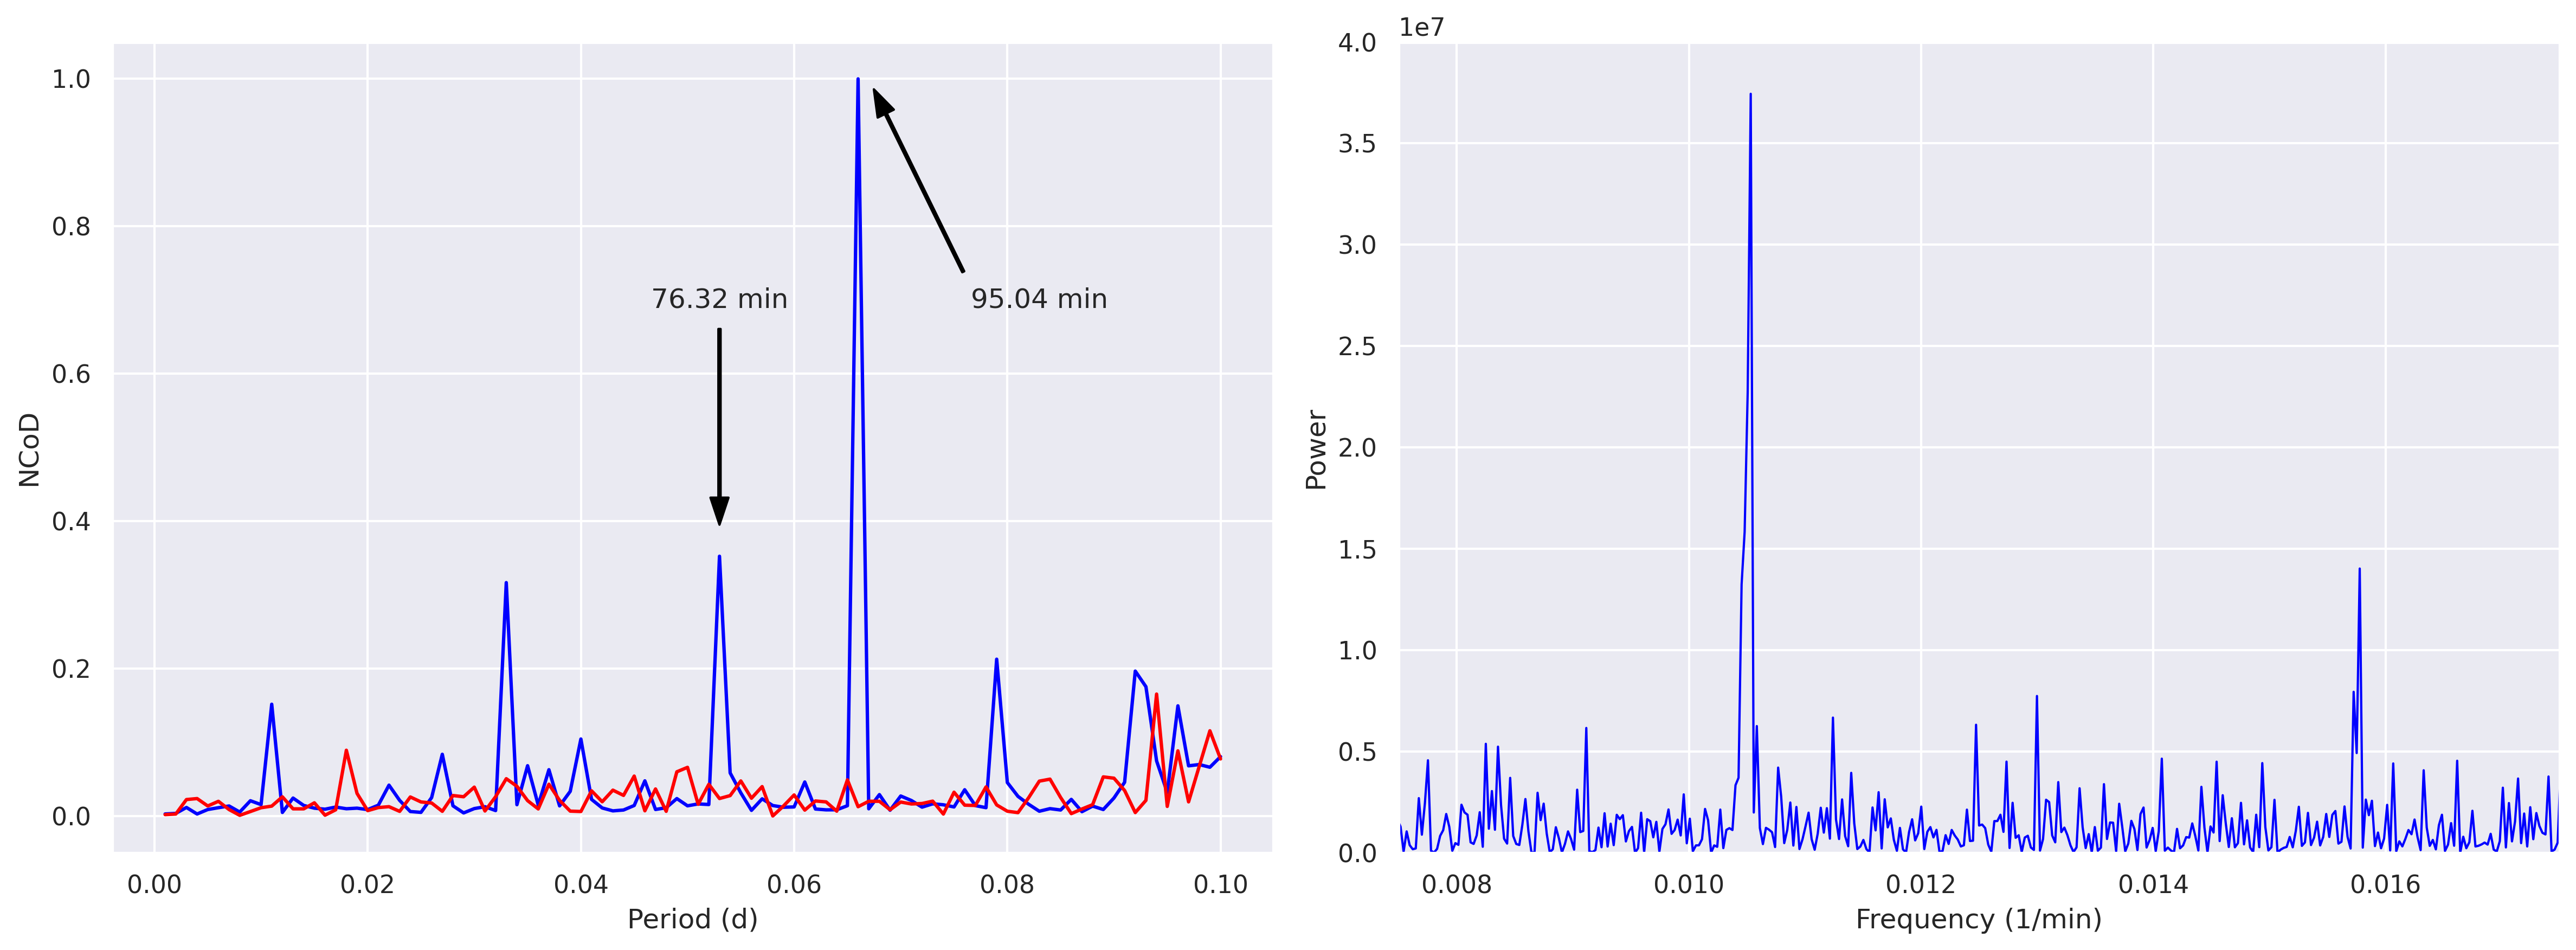

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# ============================
# Cargar y graficar la primera imagen
# ============================
# Ruta al archivo de periodograma
archivo_periodograma = "sagA-clean-gamma_periodograma.csv"
periodograma = pd.read_csv(archivo_periodograma)

# ============================
# Cargar y preparar la segunda imagen
# ============================
# Archivos RP y WF
data_rp = np.loadtxt('sagA-gamma-rp-norm.dat')
data_wf = np.loadtxt('sagA-gamma-wf-norm.dat')

# Normalizar la primera columna dividiéndola por 1000
mjd_rp = data_rp[:, 0] / 1000
flux_rp = data_rp[:, 1]

mjd_wf = data_wf[:, 0] / 1000
flux_wf = data_wf[:, 1]

# Crear DataFrames
df_rp = pd.DataFrame({'MJD': mjd_rp, 'Flux': flux_rp})
df_wf = pd.DataFrame({'MJD': mjd_wf, 'Flux': flux_wf})

# ============================
# Crear subplots: 1 fila, 2 columnas
# ============================
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

# ----------------------------
# Subplot 1: Flujo Normalizado RP y WF (lado izquierdo)
# ----------------------------
sns.lineplot(x='MJD', y='Flux', data=df_rp, color='blue', ax=axes[0])
sns.lineplot(x='MJD', y='Flux', data=df_wf, color='red', ax=axes[0])

# Anotación para 76.32 min
axes[0].annotate(
    '76.32 min',
    xy=(0.053, 0.38),
    xytext=(0.053, 0.7),
    ha='center',
    va='center',
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)

# Anotación para 95.04 min
axes[0].annotate(
    '95.04 min',
    xy=(0.067, 1),
    xytext=(0.083, 0.7),
    ha='center',
    va='center',
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)

axes[0].set_xlabel('Period (d)', fontsize=12)
axes[0].set_ylabel('NCoD', fontsize=12)
# axes[0].set_title('Flujo Normalizado (RP y WF)', fontsize=14)

# ----------------------------
# Subplot 2: Periodograma (lado derecho)
# ----------------------------
sns.lineplot(
    x=periodograma['frecuencia'], 
    y=periodograma['potencia'], 
    color='blue', 
    linewidth=1, 
    ax=axes[1]
)

axes[1].set_xlabel("Frequency (1/min)", fontsize=12)
axes[1].set_ylabel("Power", fontsize=12)
axes[1].set_xlim(0.0075, 0.0175)
axes[1].set_ylim(0, 4e7)
# axes[1].set_title("Periodograma de Lomb-Scargle", fontsize=14)

# ============================
# Ajustar diseño y guardar
# ============================
plt.tight_layout()
plt.savefig("images/combined_sagA_gamma_plots.png", format='png', dpi=300)
plt.show()
